### Data

Use the code in `src/make_data.py` to generate some fake data. You
can run it like this:

In [1]:
from src.make_data import make_data
X, y = make_data(n_features=2, n_pts=300, noise=0.1)

## kNN Implementation

**Include all your code for this section in** `src/knn.py`.

Here's the pseudocode for using k Nearest Neighbors to predict the value of a point `x`:

```
kNN:
    for every point in the dataset:
        calculate the distance between the point and x
        take the k points with the smallest distances to x (**hint: use numpy's argsort() function**)
        predict the value as the mean of the observed target values of these items
```

1. Implement the function `euclidean_distance` which computes the Euclidean distance between two numpy arrays.

**see `src/knn.py`**

2. Implement the class `KNNRegressor` in `src/knn.py`, with methods `fit`, `predict` and `__init__`. We are going to write our code similar to how sklearn does. You should be able to run your code like this:

    ```python
    knn = KNNRegressor(k=3, distance=euclidean_distance)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    ```

    Here `X` is the feature matrix as a 2d numpy array, `y` is the values as a 1d numpy array. The 3 is the *k* and `euclidean_distance` is the distance function. `predict` will return a numpy array of the predicted labels.
    
**see `src/knn.py`**

3. Implement the function `cosine_distance` which computes a cosine-similarity-based metric between two numpy arrays. Specifically, use this formula:

    ![cosine distance](images/cosine_distance.png)

**see `src/knn.py`**

4. Plot the values graphically. Use the code in `src/knn_visualization.py` to do this. Note that you'll need exactly 2 continuous features for it to work. Once you have tested it, change the `plot_predictions` function, adding an additional optional parameters to specify the name of the colormap, and test out a few different choices.

In [2]:
from src.knn_visualization import plot_predictions
from src.knn import KNNRegressor
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

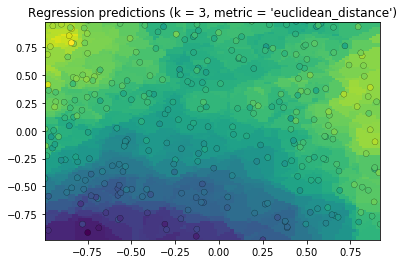

In [3]:
fig, ax = plt.subplots()
reg = KNNRegressor(k=3)
reg.fit(X, y)
plot_predictions(ax, reg, X, y)

5. Test your algorithm on a dataset used for a previous exercise. Use [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to compute the mean-squared error of your model. Investigate how this depends on the value of `k`. Were the results what you expect? Talk about this with your neighbors.

**we'll just investigate the same dataset at different values of k**

In [4]:
from sklearn.metrics import mean_squared_error

for k in range(1, 21):
    reg = KNNRegressor(k=k)
    reg.fit(X, y)
    y_pred = reg.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"k = {k:2d} MSE = {mse:6.4f}")

k =  1 MSE = 0.0000
k =  2 MSE = 0.0062
k =  3 MSE = 0.0087
k =  4 MSE = 0.0109
k =  5 MSE = 0.0108
k =  6 MSE = 0.0117
k =  7 MSE = 0.0117
k =  8 MSE = 0.0118
k =  9 MSE = 0.0123
k = 10 MSE = 0.0127
k = 11 MSE = 0.0128
k = 12 MSE = 0.0131
k = 13 MSE = 0.0134
k = 14 MSE = 0.0137
k = 15 MSE = 0.0140
k = 16 MSE = 0.0145
k = 17 MSE = 0.0149
k = 18 MSE = 0.0155
k = 19 MSE = 0.0156
k = 20 MSE = 0.0159


**This MSE is increasing with k because we're testing on the training data. This is bad; we'll talk about it with cross validations. Given that, we would expect these results, in particular, k=1 should give no error on the training data.**

**A (somewhat) better approach is to do train-test split first.**

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

for k in range(1, 21):
    reg = KNNRegressor(k=k)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"k = {k:2d} MSE = {mse:6.4f}")

k =  1 MSE = 0.0290
k =  2 MSE = 0.0227
k =  3 MSE = 0.0207
k =  4 MSE = 0.0193
k =  5 MSE = 0.0179
k =  6 MSE = 0.0181
k =  7 MSE = 0.0176
k =  8 MSE = 0.0181
k =  9 MSE = 0.0184
k = 10 MSE = 0.0198
k = 11 MSE = 0.0209
k = 12 MSE = 0.0224
k = 13 MSE = 0.0226
k = 14 MSE = 0.0244
k = 15 MSE = 0.0252
k = 16 MSE = 0.0260
k = 17 MSE = 0.0255
k = 18 MSE = 0.0260
k = 19 MSE = 0.0251
k = 20 MSE = 0.0257


**Now MSE is minimized at an intermediate value of k.**

6. Add an additional option to your class to allow it to do a weighted mean, where the training points are weighted by the inverse of the distance to the point to be predicted, similar to the `weights='distance'` option in [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

**see `src/knn.py`**

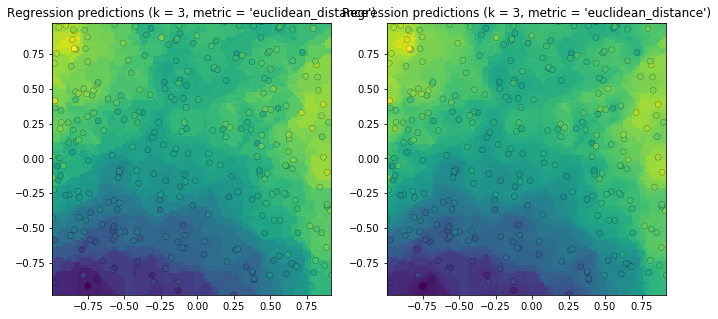

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11,5))
reg = KNNRegressor(k=3)
reg.fit(X, y)
plot_predictions(axs[0], reg, X, y)

reg = KNNRegressor(k=3, weighted=True)
reg.fit(X, y)
plot_predictions(axs[1], reg, X, y)

7. Implement the `manhattan_distance` function. Compare the graphs produced with that, `euclidean_distance`, and `cosine_distance`. How are the graphs different?
**see `src/knn.py`**

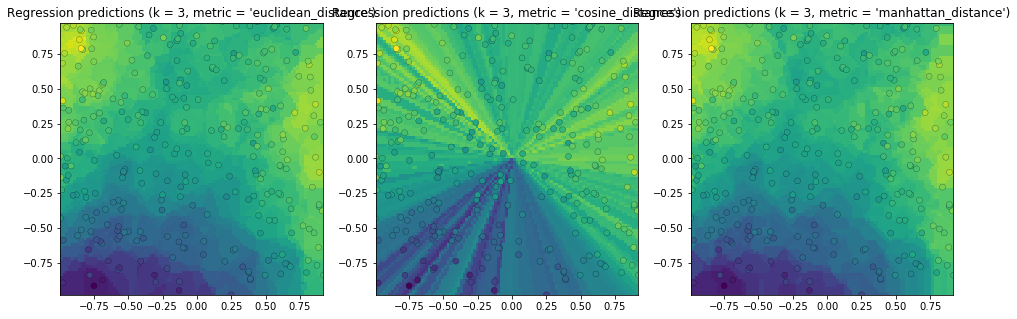

In [7]:
from src.knn import euclidean_distance, cosine_distance, manhattan_distance

fig, axs = plt.subplots(1, 3, figsize=(16,5))

for ax, dist in zip(axs, [euclidean_distance, cosine_distance, manhattan_distance]):
    reg = KNNRegressor(k=3, distance=dist)
    reg.fit(X, y)
    plot_predictions(ax, reg, X, y)

**Note that for cosine dissimilarity only angle matters. For manhattan distance the boundaries are often straight lines or diagonals (you might want to increase mesh_count in the code and make the figure larger).**